In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
import urllib

In [7]:
req = urllib.request.urlopen('https://raw.githubusercontent.com/opencv/opencv/master/samples/data/messi5.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv.imdecode(arr, cv.IMREAD_GRAYSCALE) # 'Load it as grayscale'

In [8]:
req = urllib.request.urlopen('https://docs.opencv.org/master/messi_face.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img_face = cv.imdecode(arr, cv.IMREAD_GRAYSCALE) # 'Load it as grayscale'

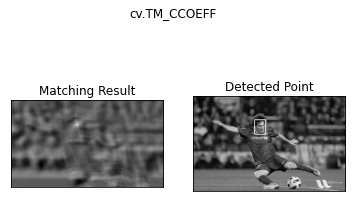

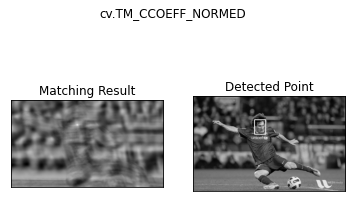

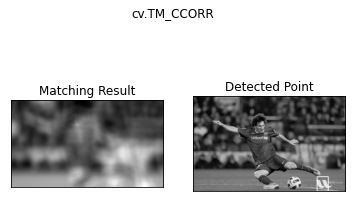

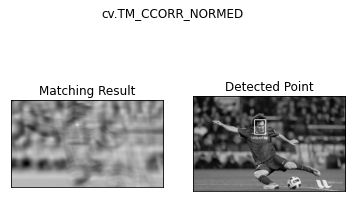

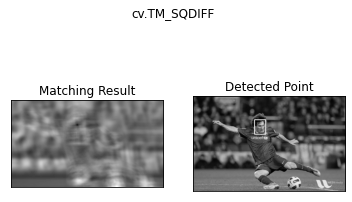

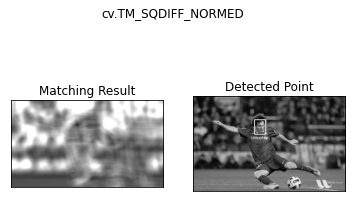

In [9]:
img2 = img.copy()
template=img_face
w, h = template.shape[::-1]

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

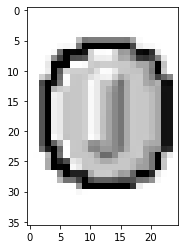

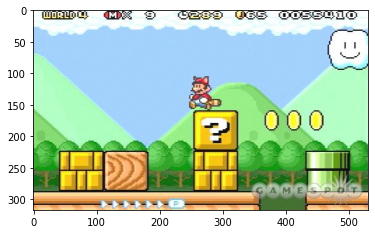

In [19]:
# Template Matching with Multiple Objects

req = urllib.request.urlopen('https://raw.githubusercontent.com/advcha/OpenCV-Python/master/images/mario.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img_rgb = cv.imdecode(arr, cv.IMREAD_UNCHANGED) # 'Load it as grayscale'
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
img_rgb =  cv.cvtColor(img_rgb, cv.COLOR_BGR2RGB)

req = urllib.request.urlopen('https://raw.githubusercontent.com/advcha/OpenCV-Python/master/images/mario_coin.png')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
template= cv.imdecode(arr, cv.IMREAD_GRAYSCALE)

plt.imshow(template, cmap="gray")

w, h = template.shape[::-1]
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.figure()
plt.imshow(img_rgb)
plt.show()